# Irregular Sampling Techniques Visualization

This notebook visualizes three irregular sampling techniques on time series datasets:
-  Uniform Random Missing (i.i.d.)
-  Bursty/Clustered Missing (Markov chain)
-  Adaptive/Variance-driven Sampling

In [1]:
! pip install numpy pandas matplotlib seaborn -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sys

sys.path.append('..')

from utils.irregular_sampling import (
    apply_uniform_random_missing,
    apply_bursty_missing,
    apply_adaptive_missing,
    get_pattern_statistics
)




[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Configuration

In [2]:
## dataset

dataset_dir = '../dataset'
datasets = {
    'ETTh1': f'{dataset_dir}/ETT-small/ETTh1.csv',
    'ETTh2': f'{dataset_dir}/ETT-small/ETTh2.csv',
    'ETTm1': f'{dataset_dir}/ETT-small/ETTm1.csv',
    'ETTm2': f'{dataset_dir}/ETT-small/ETTm2.csv',
    'Traffic': f'{dataset_dir}/traffic/traffic.csv',
    'Exchange': f'{dataset_dir}/exchange_rate/exchange_rate.csv',
    'Weather': f'{dataset_dir}/weather/weather.csv',
    'ECL': f'{dataset_dir}/electricity/electricity.csv'
}

def load_dataset(path, sample_len=1000):
    """Load dataset and return first sample_len points"""
    df = pd.read_csv(path)
    df['date'] = pd.to_datetime(df['date'])
    return df.head(sample_len)

## sampling parameters

sample_len = 250
seed = 42

# i.i.d

missing_rate = 0.3

# bursty
p_miss_to_miss = 0.8
p_obs_to_miss = 0.1

# adaptive
window_size = 24
target_retention = 0.7

patterns = {
    'Uniform': lambda df: apply_uniform_random_missing(df, missing_rate=missing_rate, seed=seed),
    'Bursty': lambda df: apply_bursty_missing(df, p_miss_to_miss=p_miss_to_miss, p_obs_to_miss=p_obs_to_miss, seed=seed),
    'Adaptive': lambda df: apply_adaptive_missing(df, window_size=window_size, target_retention=target_retention, seed=seed)
}


In [3]:
## visualization

def plot_sampling_pattern(df, mask, title):
    """Plot time series with sampling mask overlay"""
    feature_cols = [col for col in df.columns if col != 'date']
    first_col = feature_cols[0]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 4), sharex=True, 
                                    gridspec_kw={'height_ratios': [3, 1]})
    
    # Plot time series
    ax1.plot(df.index, df[first_col], 'gray', alpha=0.3, linewidth=0.5, label='Missing')
    ax1.plot(df.index[mask], df[first_col][mask], 'b-', linewidth=1, label='Observed')
    ax1.scatter(df.index[mask], df[first_col][mask], c='red', s=10, alpha=0.5, zorder=5)
    ax1.set_ylabel('Value')
    ax1.set_title(title)
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    
    # Plot mask
    ax2.fill_between(df.index, 0, mask.astype(int), step='mid', alpha=0.6, color='blue')
    ax2.set_ylabel('Observed')
    ax2.set_xlabel('Time Index')
    ax2.set_ylim([-0.1, 1.1])
    ax2.set_yticks([0, 1])
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

## Visualize All Datasets and Patterns

Dataset: ETTh1


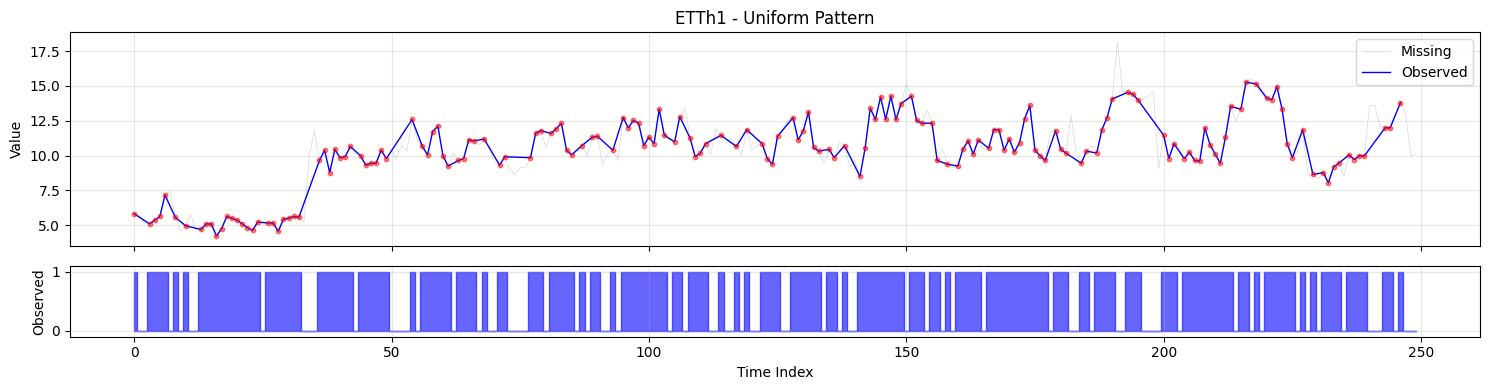

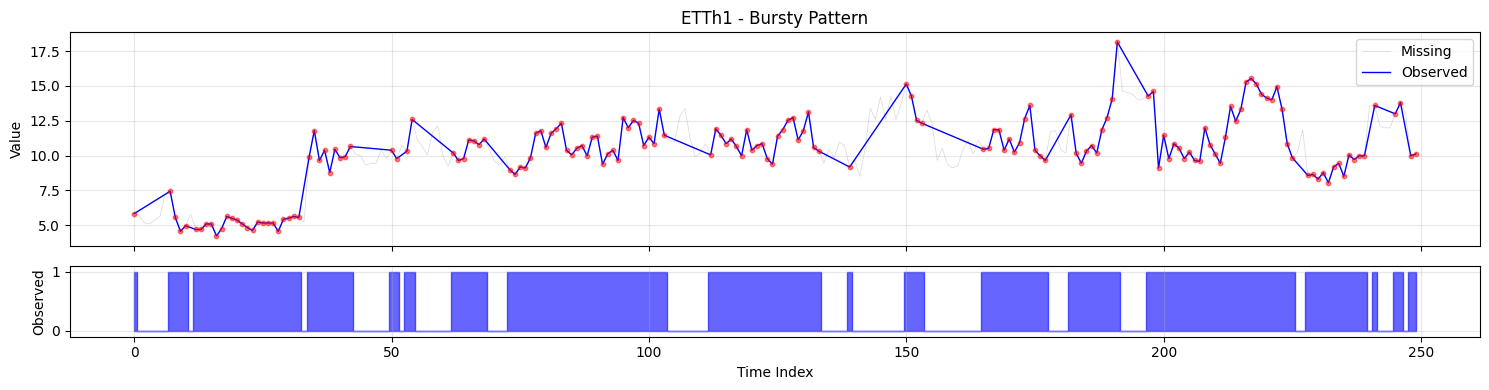

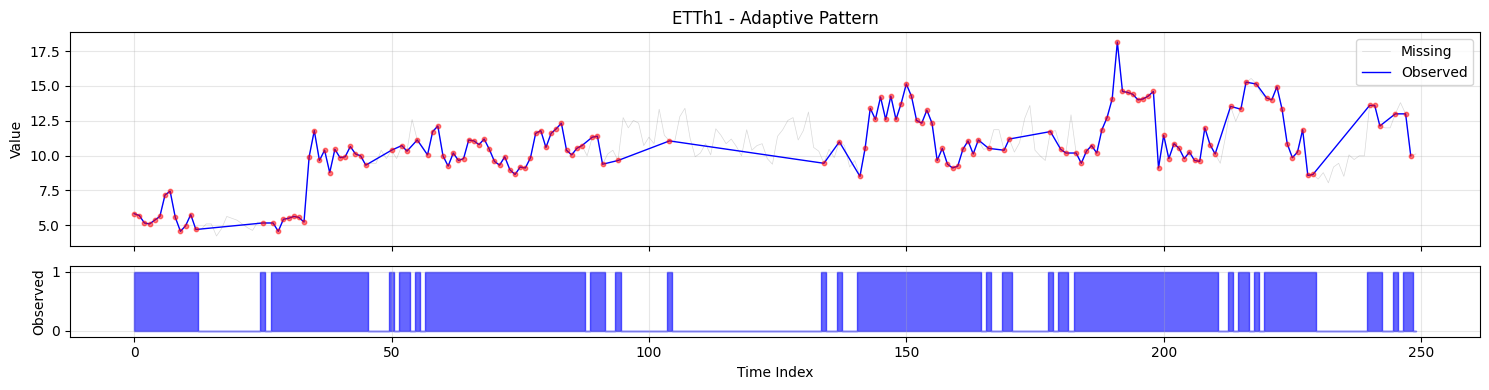

          retention_rate  n_observed  n_total  avg_gap  max_gap  gap_std
Uniform            0.700       175.0    250.0    1.414      5.0    0.803
Bursty             0.692       173.0    250.0    1.448     12.0    1.678
Adaptive           0.612       153.0    250.0    1.632     30.0    2.823
Dataset: ETTh2


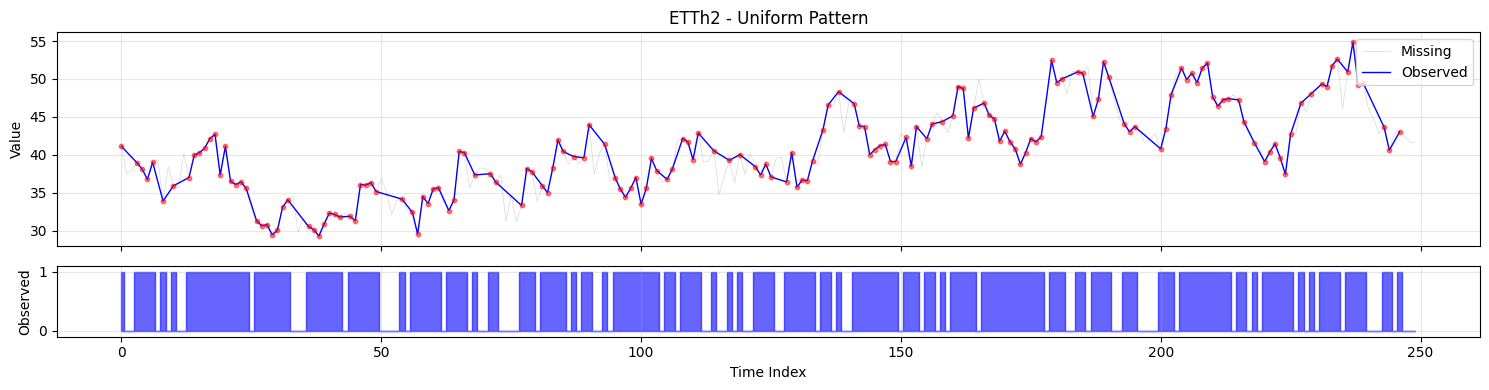

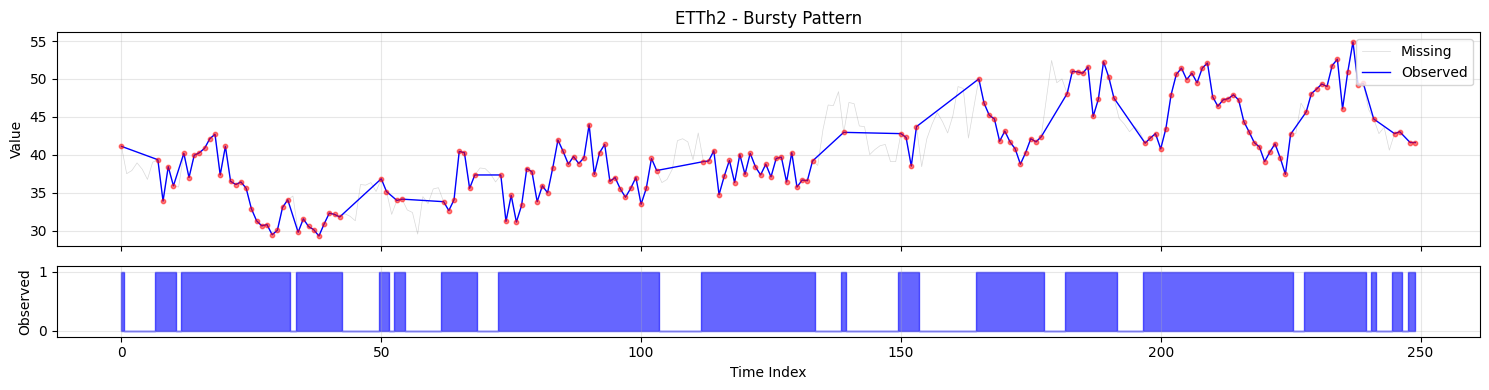

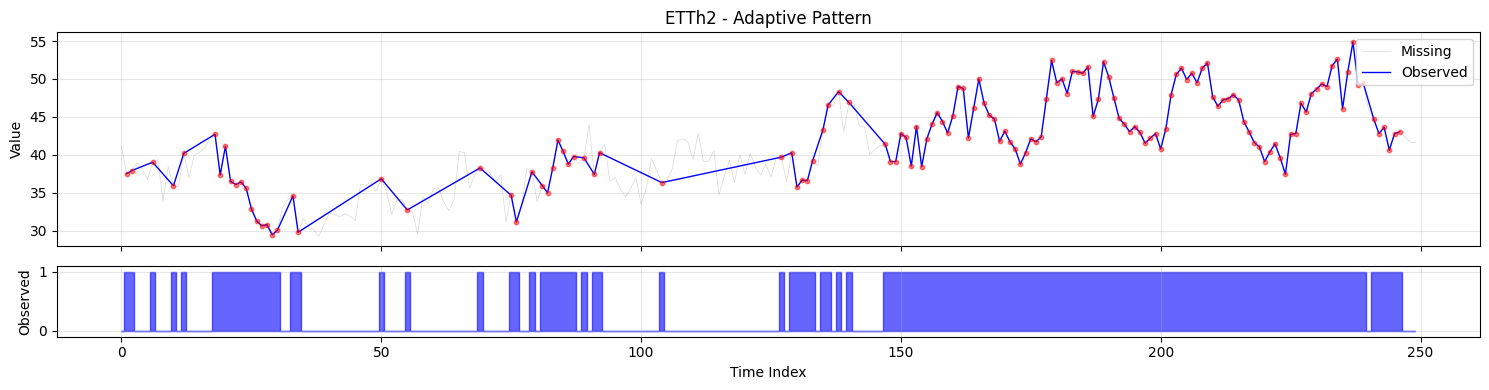

          retention_rate  n_observed  n_total  avg_gap  max_gap  gap_std
Uniform            0.700       175.0    250.0    1.414      5.0    0.803
Bursty             0.692       173.0    250.0    1.448     12.0    1.678
Adaptive           0.584       146.0    250.0    1.690     23.0    2.713
Dataset: ETTm1


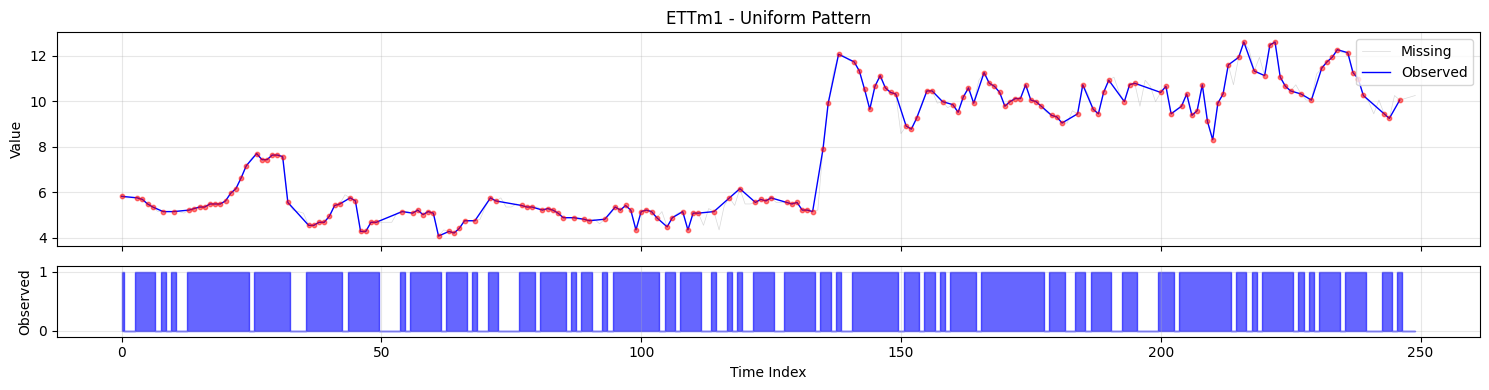

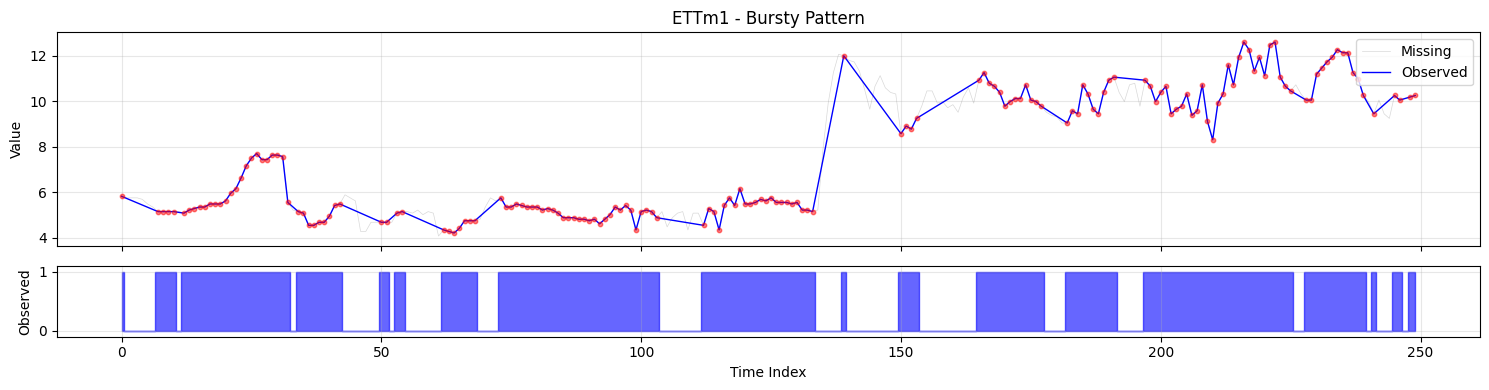

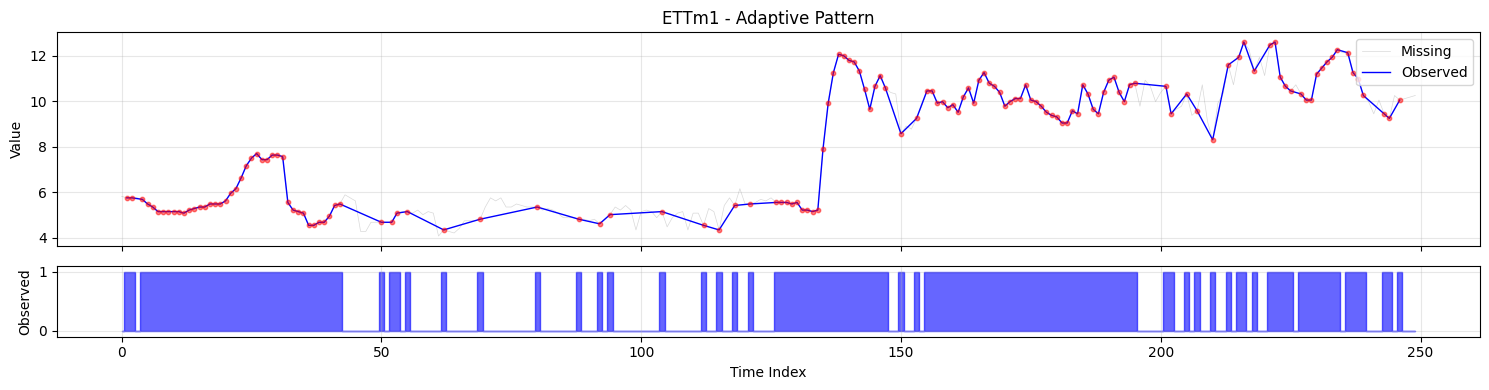

          retention_rate  n_observed  n_total  avg_gap  max_gap  gap_std
Uniform            0.700       175.0    250.0    1.414      5.0    0.803
Bursty             0.692       173.0    250.0    1.448     12.0    1.678
Adaptive           0.600       150.0    250.0    1.644     11.0    1.727
Dataset: ETTm2


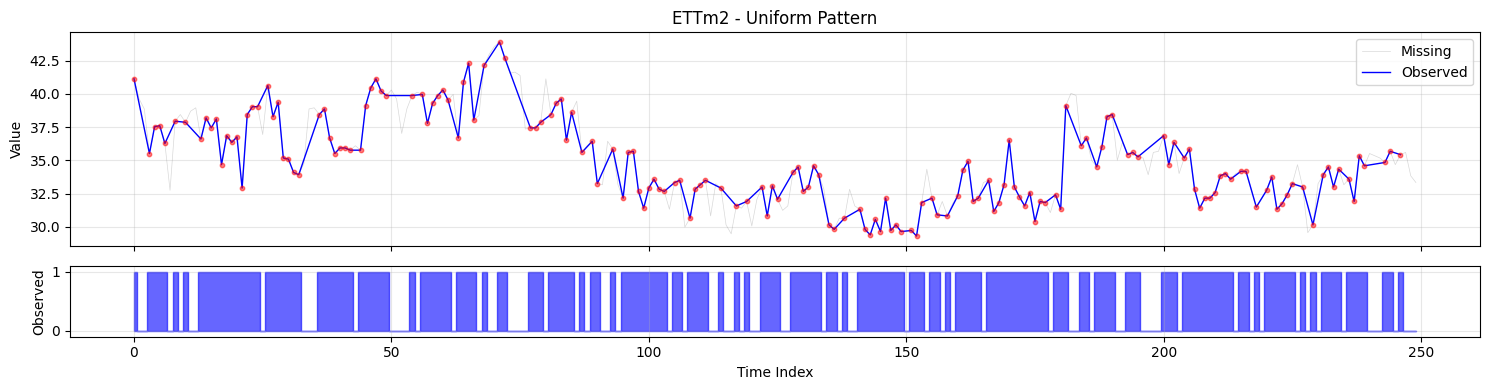

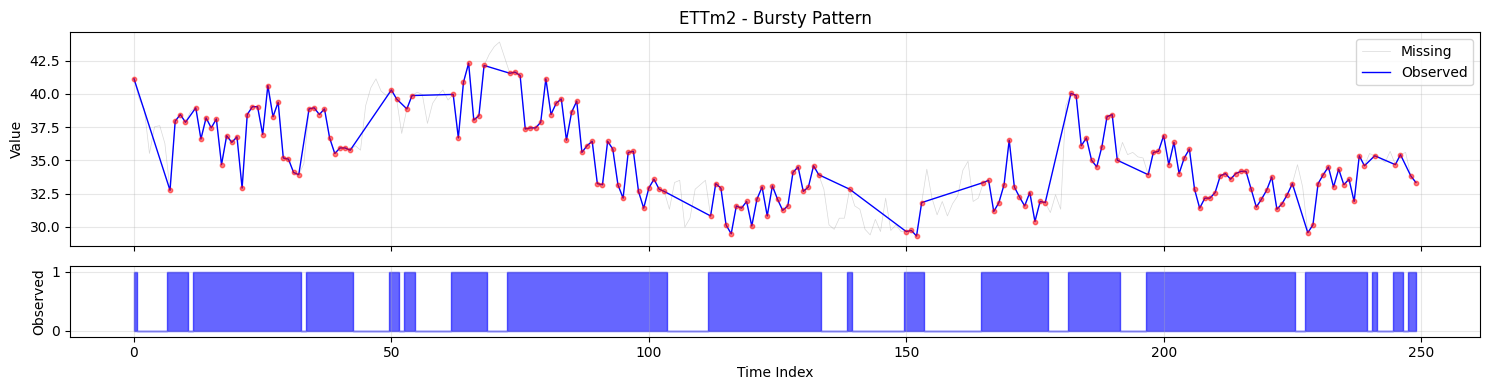

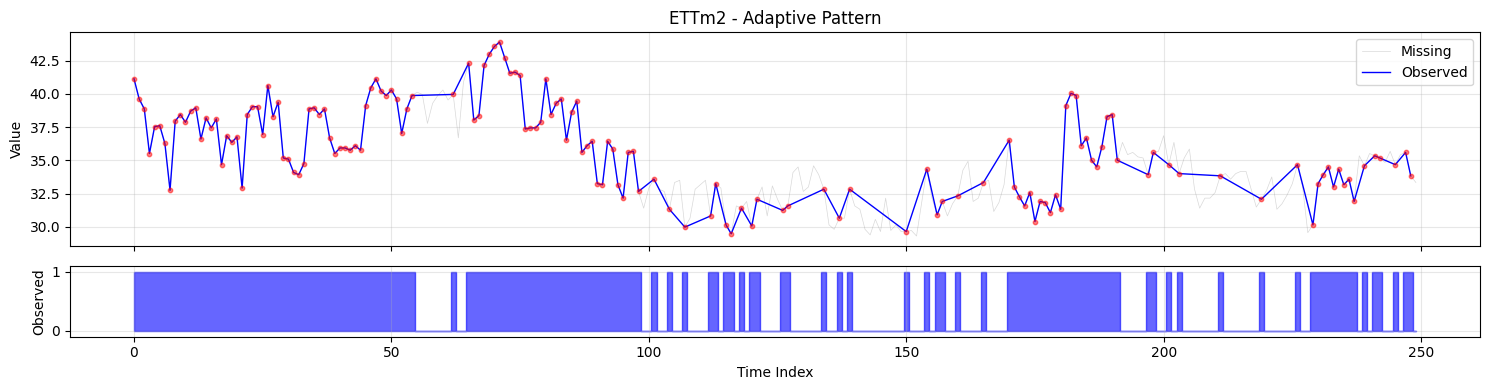

          retention_rate  n_observed  n_total  avg_gap  max_gap  gap_std
Uniform            0.700       175.0    250.0    1.414      5.0    0.803
Bursty             0.692       173.0    250.0    1.448     12.0    1.678
Adaptive           0.620       155.0    250.0    1.610     11.0    1.621
Dataset: Traffic


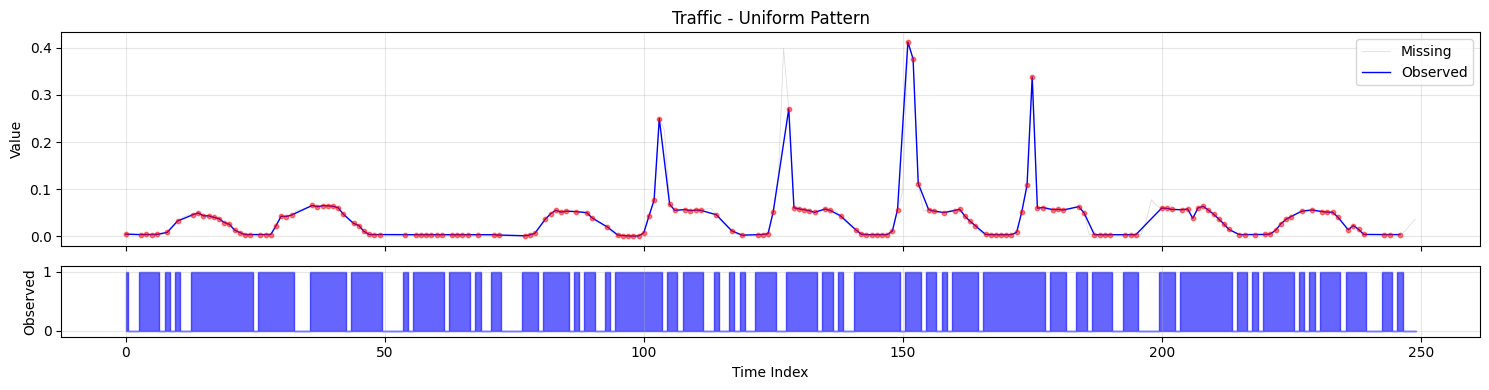

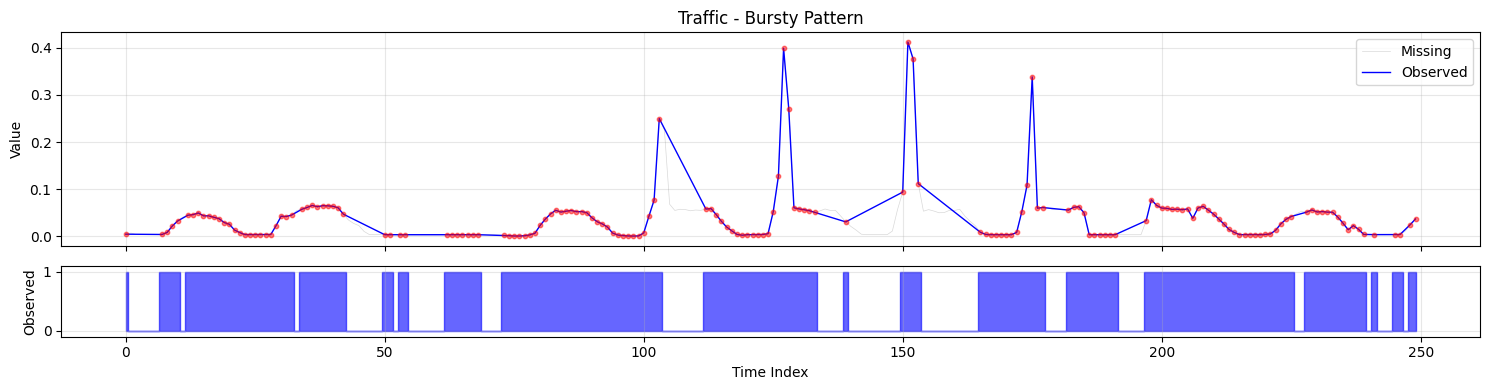

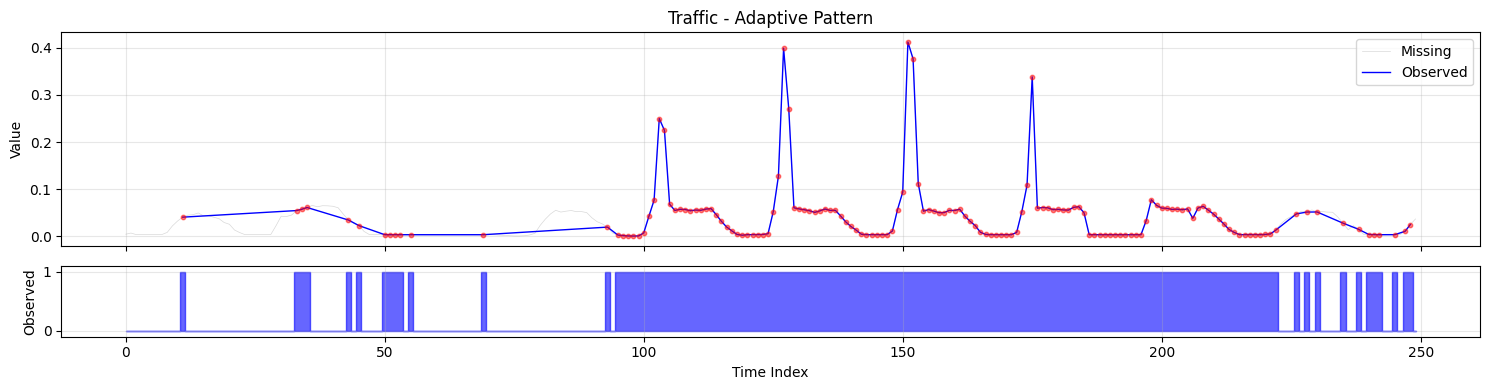

          retention_rate  n_observed  n_total  avg_gap  max_gap  gap_std
Uniform            0.700       175.0    250.0    1.414      5.0    0.803
Bursty             0.692       173.0    250.0    1.448     12.0    1.678
Adaptive           0.608       152.0    250.0    1.570     24.0    2.813
Dataset: Exchange


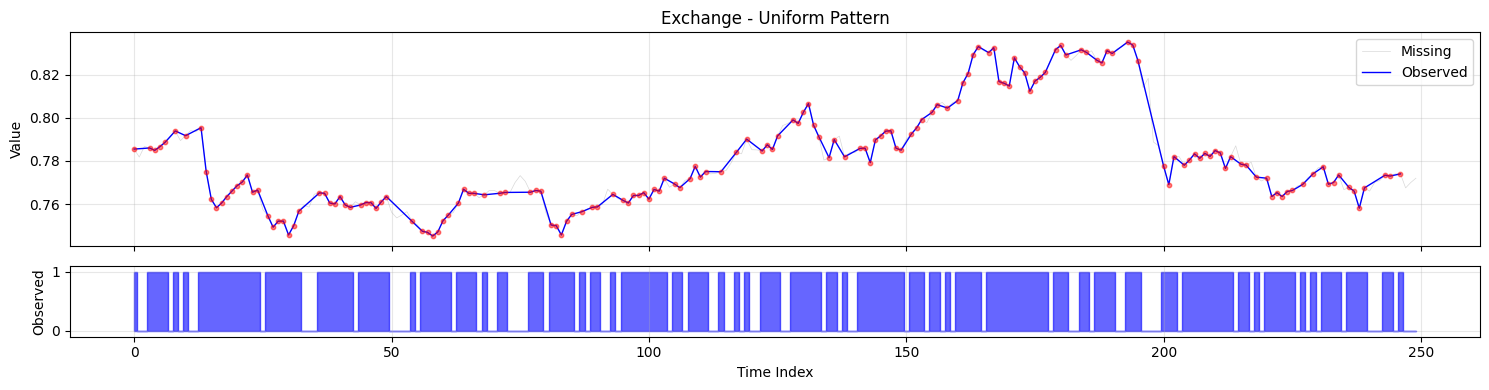

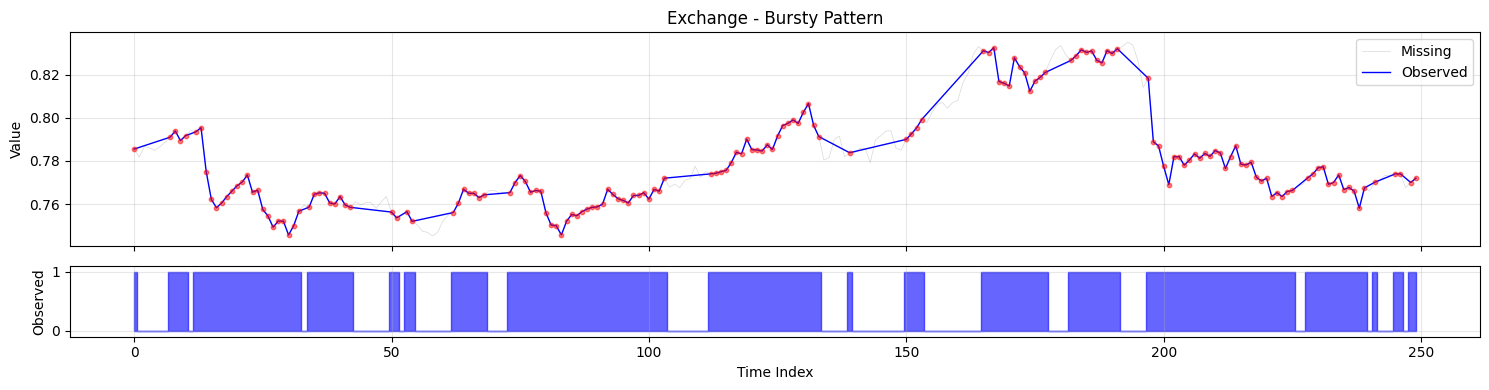

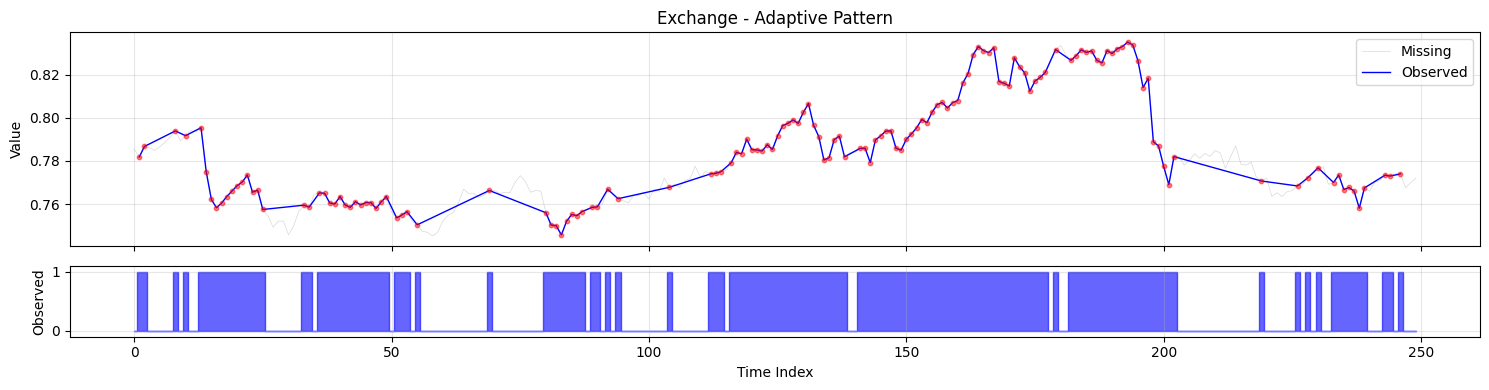

          retention_rate  n_observed  n_total  avg_gap  max_gap  gap_std
Uniform            0.700       175.0    250.0    1.414      5.0    0.803
Bursty             0.692       173.0    250.0    1.448     12.0    1.678
Adaptive           0.600       150.0    250.0    1.644     17.0    2.229
Dataset: Weather


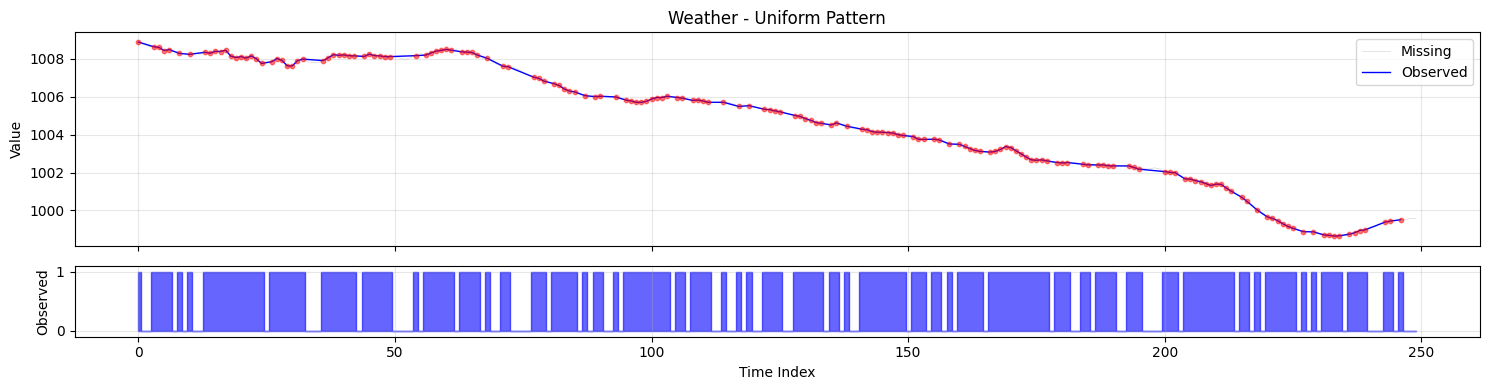

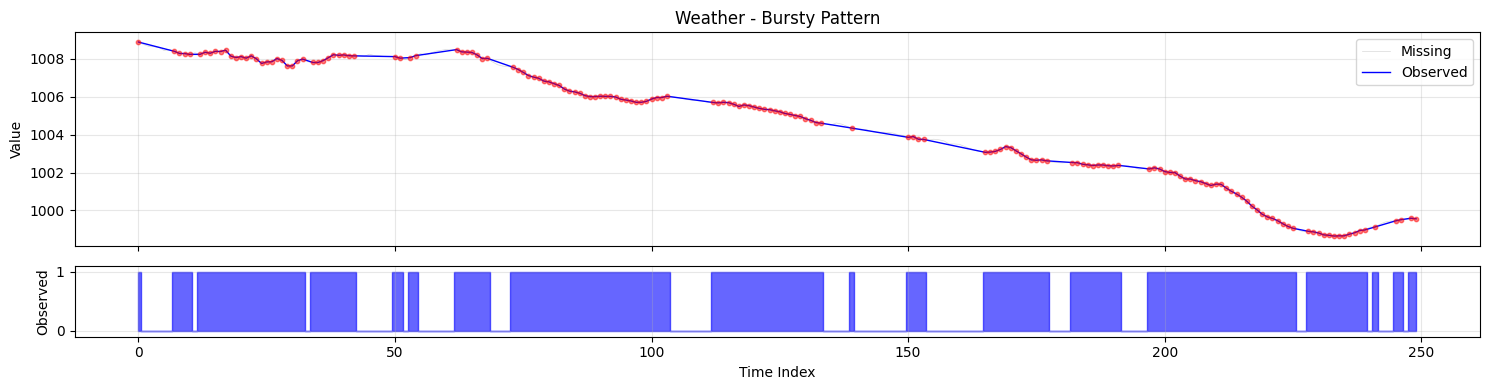

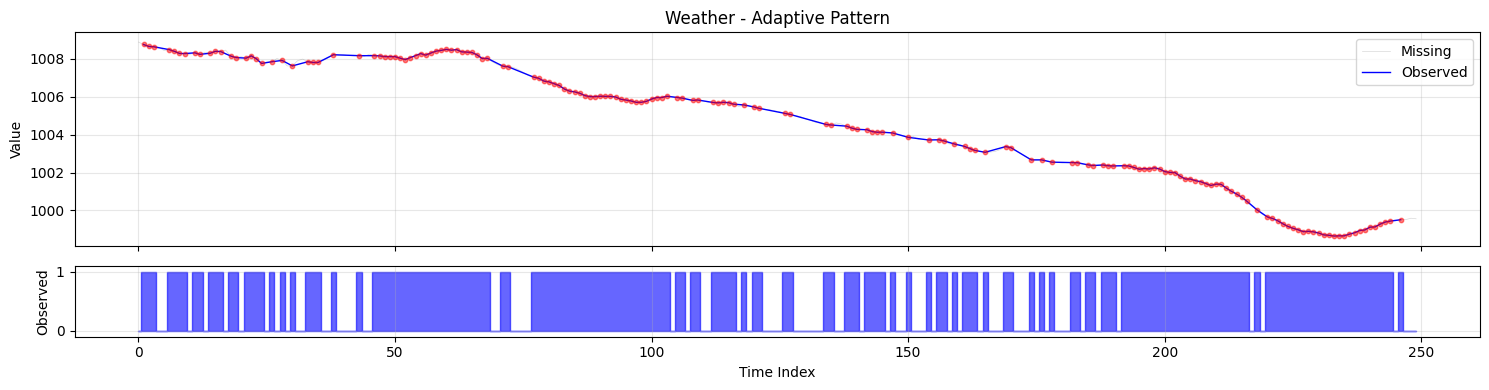

          retention_rate  n_observed  n_total  avg_gap  max_gap  gap_std
Uniform            0.700       175.0    250.0    1.414      5.0    0.803
Bursty             0.692       173.0    250.0    1.448     12.0    1.678
Adaptive           0.700       175.0    250.0    1.408      7.0    0.922
Dataset: ECL


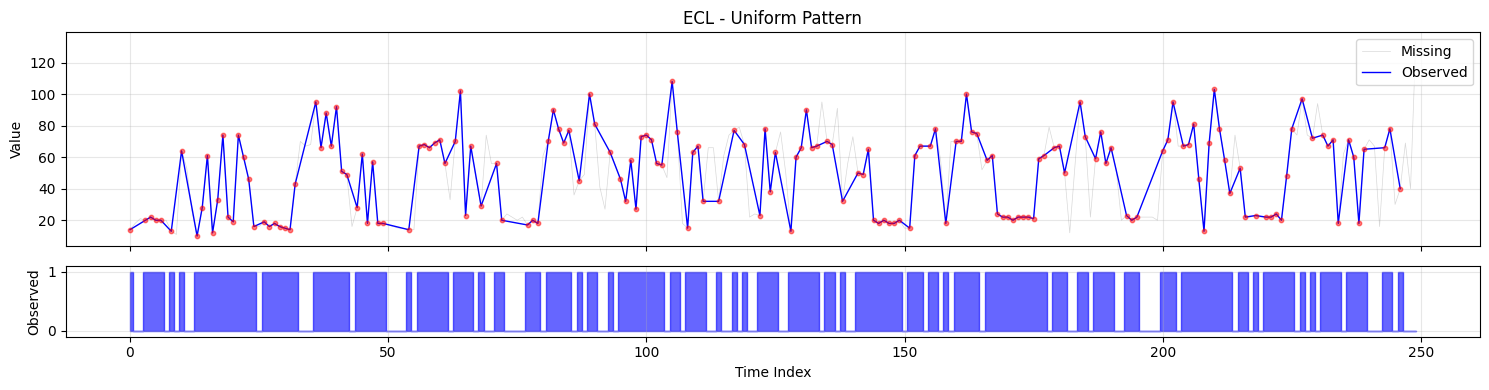

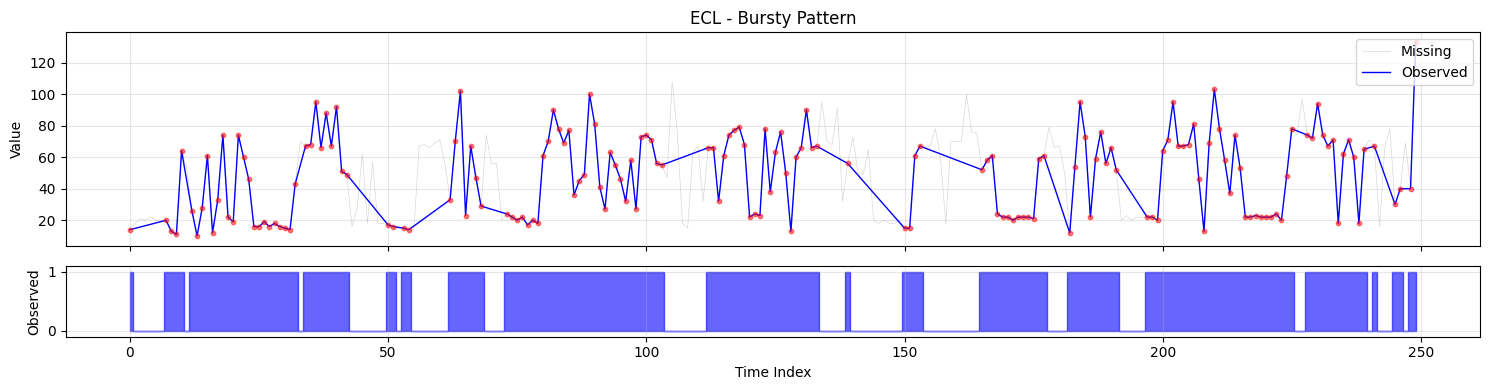

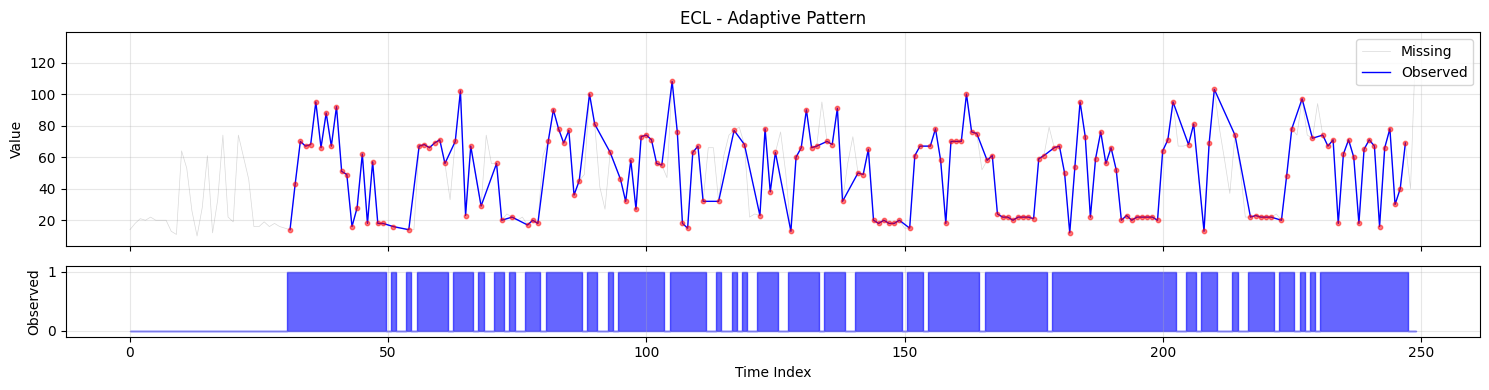

          retention_rate  n_observed  n_total  avg_gap  max_gap  gap_std
Uniform            0.700       175.0    250.0    1.414      5.0    0.803
Bursty             0.692       173.0    250.0    1.448     12.0    1.678
Adaptive           0.688       172.0    250.0    1.263      4.0    0.598


In [4]:
for dataset_name, dataset_path in datasets.items():
    print(f"Dataset: {dataset_name}")

    df = load_dataset(dataset_path, sample_len=sample_len)
    
    stats_dict = {}
    for pattern_name, pattern_fn in patterns.items():
        mask = pattern_fn(df)
        stats = get_pattern_statistics(mask)
        stats_dict[pattern_name] = stats
        
        # Plot
        title = f"{dataset_name} - {pattern_name} Pattern"
        plot_sampling_pattern(df, mask, title)
        plt.show()
    
    
    print((pd.DataFrame(stats_dict).T).round(3))